In [1]:
import meshplot as mp 
import igl 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
import os
import shapely
from shapely.geometry import Point
from shapely.geometry import Polygon, mapping
from shapely.geometry.polygon import Polygon
import sympy
#from sympy import Point,Line#,Polygon


**Defining the 3d cylindrical mesh**

N = Number of unit meshes along a radii
r = splitting N radiis of OD - ID (43-18)
thetasteps = number of lines split among 360 degree 
z_steps= number of depth elements in z 
z= Depth elements devided for 60mm 
nodes= contains all cordinates required for the mesh 
e_list= contains 8 tuple nodes defining a rectangular mesh 

In [2]:
N= 17
IR=15
OR=50
r= np.linspace(IR, OR, N)
thetasteps= 72
dt=2*np.pi/thetasteps
theta=  np.linspace(0, 2*np.pi-dt, thetasteps)

z_steps= 21
z=np.linspace(0,60,z_steps)

z_count=1
count=1

nodes=[]


for i in range(z_steps):
    for j in range(N):
        for k in range(thetasteps):
            nodes.append([count,
                                r[j]*np.cos(theta[k]),
                                r[j]*np.sin(theta[k]),
                                z[i]])
            count=count+1
               

e_list=[]
            

for m in range(0,z_steps-1):
    lis=np.arange(1+m*thetasteps*N,(m+1)*thetasteps*N-thetasteps+1,1)
    #print(len(lis),lis)
    for g in range(len(lis)):
        if lis[g]%thetasteps==0:
            #print(lis[g])
            n= int(lis[g]/thetasteps)
            e_list.append([z_count, 
                                lis[g], 
                                (lis[g]+1)%thetasteps +(n-1)*thetasteps, 
                                (lis[g]+thetasteps+1)%thetasteps+n*thetasteps, 
                                lis[g]+thetasteps,
                                lis[g]+ (N*thetasteps), 
                                (lis[g]+1)%thetasteps +(n-1)*thetasteps+ (N*thetasteps),
                                (lis[g]+thetasteps+1)%thetasteps+n*thetasteps+ (N*thetasteps), 
                                lis[g]+thetasteps + (N*thetasteps)])

        else:
            e_list.append([z_count, 
                                lis[g], 
                                (lis[g]+1), 
                                (lis[g]+thetasteps+1), 
                                lis[g]+thetasteps,
                                lis[g]+ (N*thetasteps), 
                                (lis[g]+1)+ (N*thetasteps),
                                (lis[g]+thetasteps+1)+ (N*thetasteps), 
                                lis[g]+thetasteps + (N*thetasteps)])
        z_count=z_count+1

#print(r)
        
#print(e_list) 




**Metal area defined**
Deafult is a circular configuration where the first two set of radii are metal and the outermost radiie consist of metal 

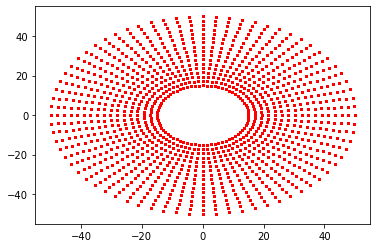

23040 23040 25704


In [3]:
X=[item[1] for item in nodes]
Y=[item[2] for item in nodes] 
Z=[item[3] for item in nodes]


plt.scatter(X,Y,s=3,color="red")

#coord=np.zeros(shape=(len(e_list),8))

#print(coord)
coord=[]

for i in range(len(e_list)):
    coord.append(i)

for i in range(len(e_list)):
    coord[i]=[[nodes[e_list[i][1]-1][1],nodes[e_list[i][1]-1][2]],
          [nodes[e_list[i][2]-1][1],nodes[e_list[i][2]-1][2]],
          [nodes[e_list[i][3]-1][1],nodes[e_list[i][3]-1][2]],
          [nodes[e_list[i][4]-1][1],nodes[e_list[i][4]-1][2]]]
    coord[i].append(coord[i][0])
    xs, ys = zip(*coord[i])
    #plt.plot(xs,ys,color='blue') 


#print(coord.shape)
    
    
plt.show()

ele=np.zeros(shape=(len(e_list),5,2))


print(len(e_list),len(ele),len(nodes))


for i in range(len(e_list)):
    ele[i]=[[nodes[e_list[i][1]-1][1],nodes[e_list[i][1]-1][2]],
              [nodes[e_list[i][2]-1][1],nodes[e_list[i][2]-1][2]],
              [nodes[e_list[i][3]-1][1],nodes[e_list[i][3]-1][2]],
              [nodes[e_list[i][4]-1][1],nodes[e_list[i][4]-1][2]],
              [nodes[e_list[i][1]-1][1],nodes[e_list[i][1]-1][2]]]
    #xs, ys = zip(*ele[i])
    #plt.plot(xs,ys,color='blue') 

    
plt.rcParams['figure.figsize'] = [40, 40]

#print(ele)
#plt.scatter(X,Y,s=0.2)
plt.show()



The outer ring elements are specified to be metal

- relevant metal elements are appended to a list 'metal'

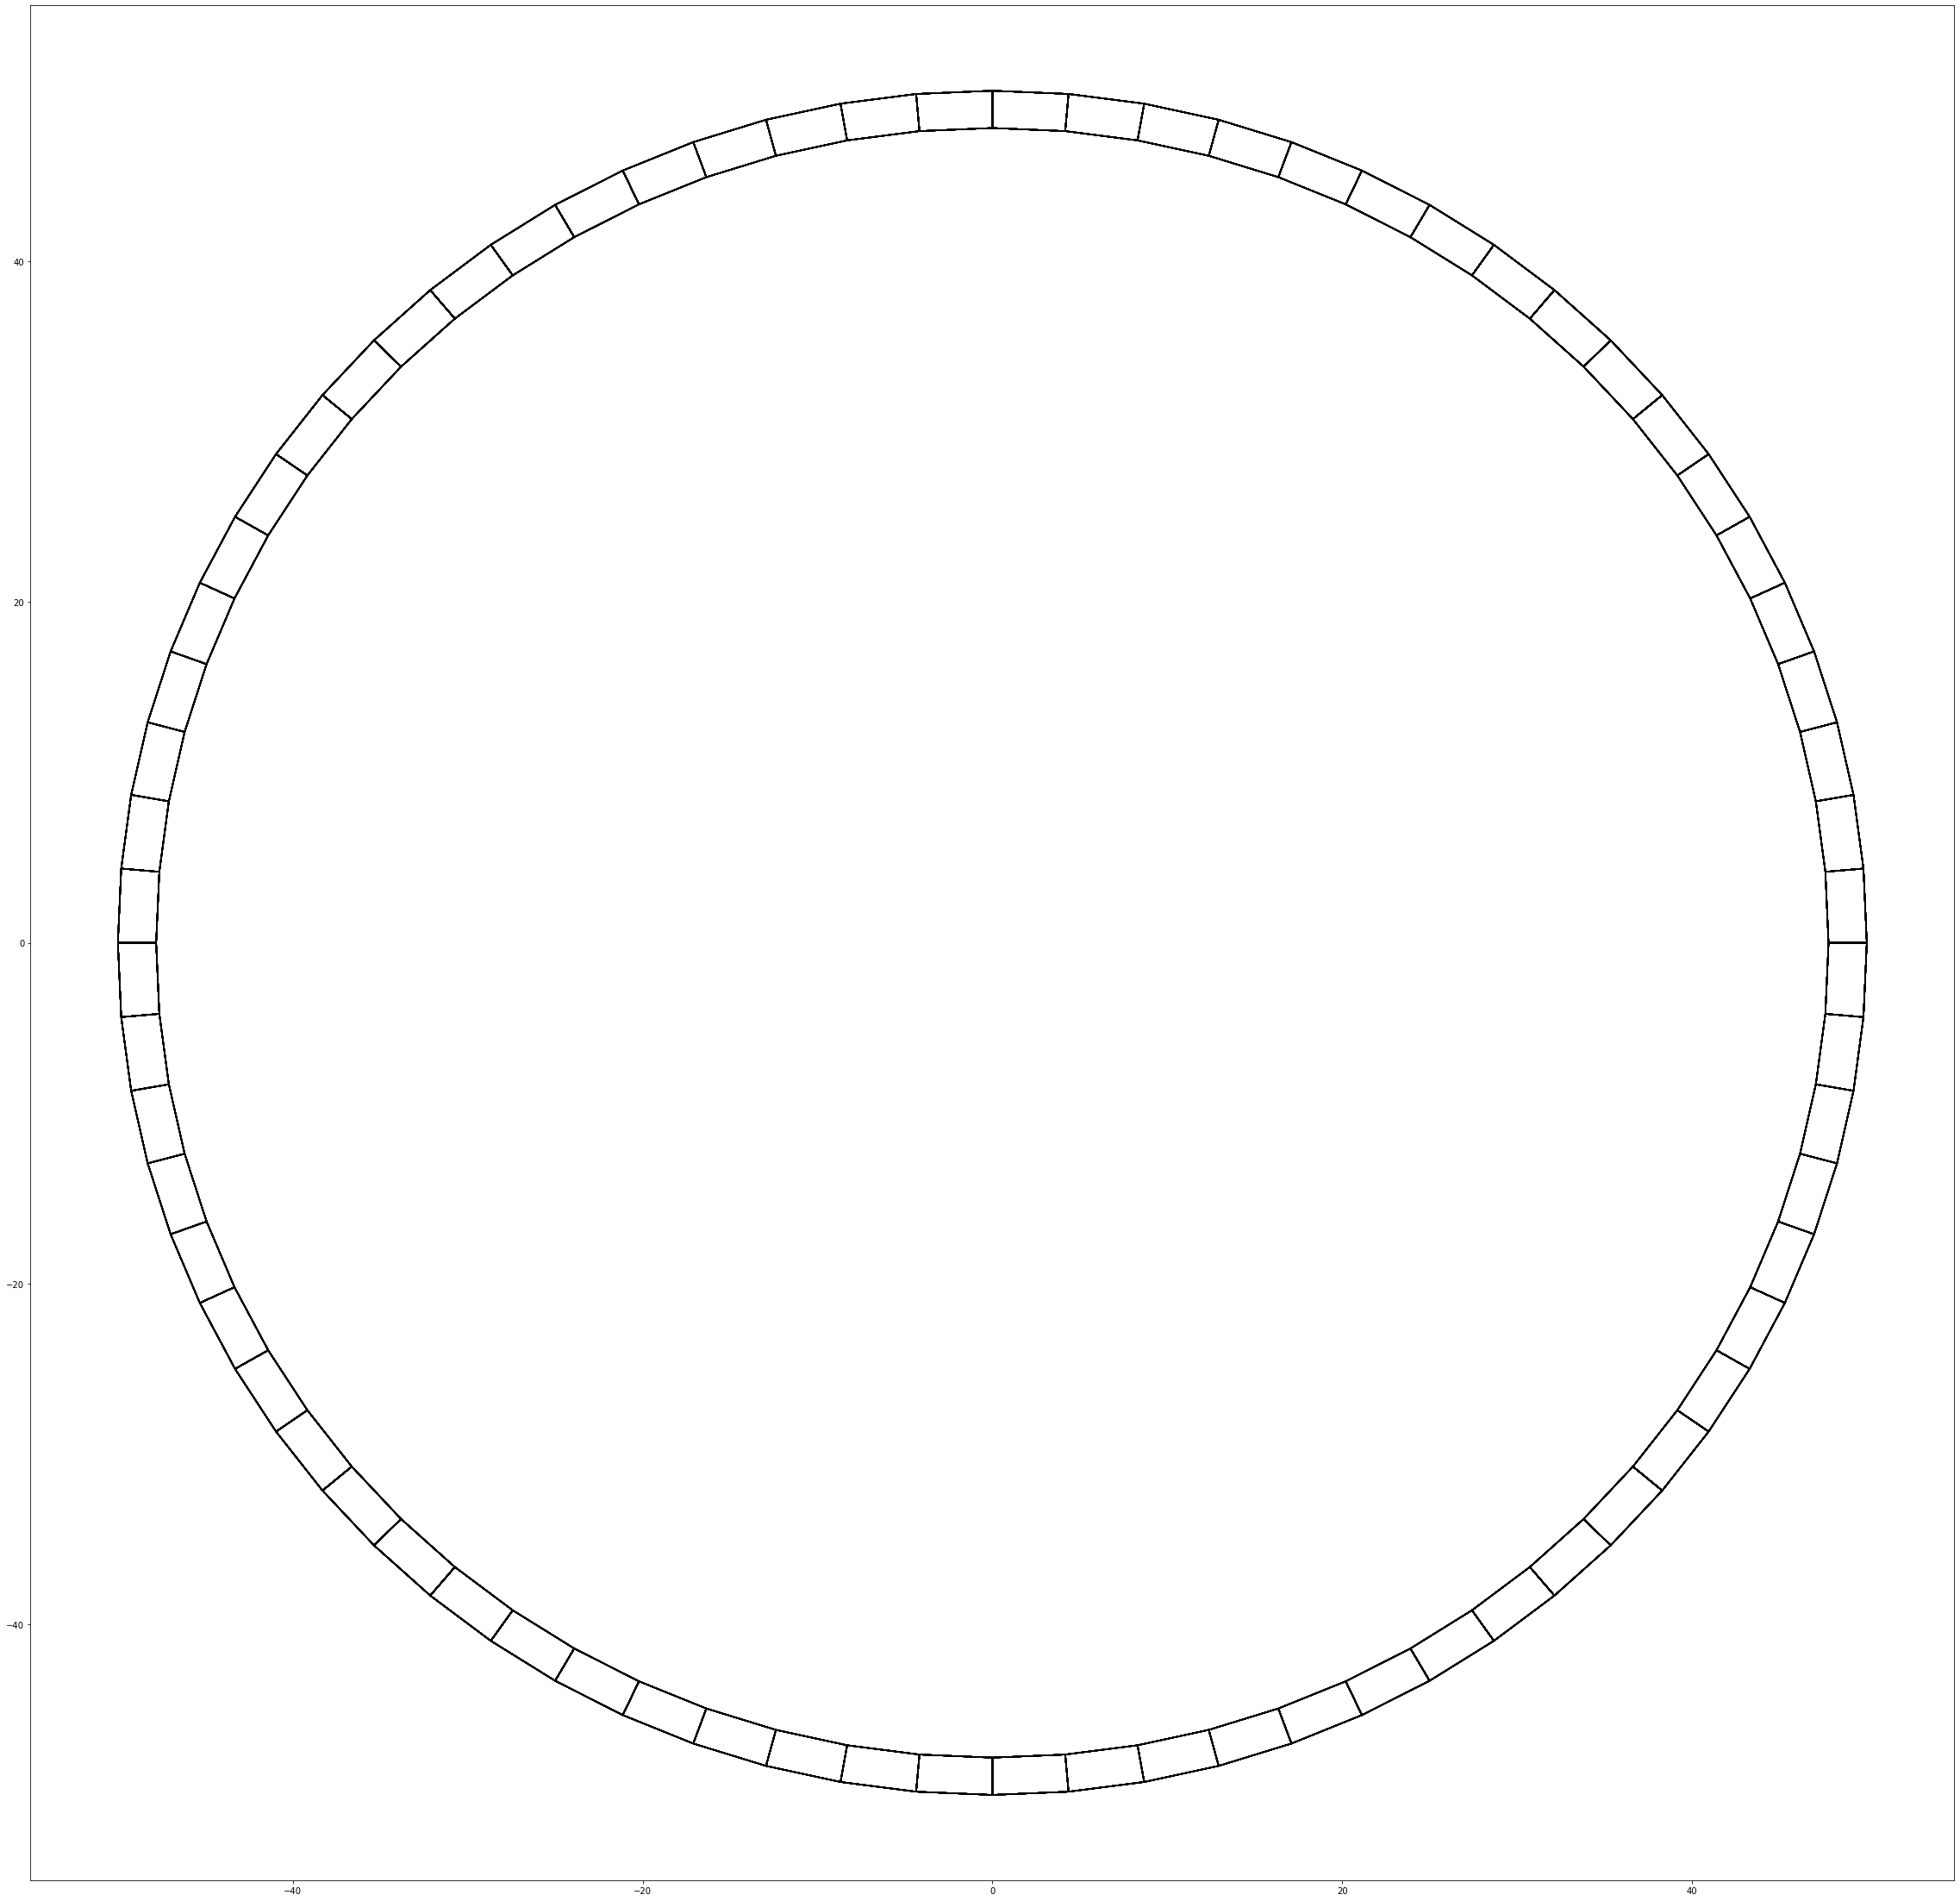

In [4]:
##

def polar1(x, y):
    """returns r, theta(degrees)
    """
    rads = (x ** 2 + y ** 2) ** .5
    theta_1 = math.degrees(math.atan2(y,x))
    theta_1 = (theta_1 + 360) % 360
    #print(theta_1)
    return round(rads,1), round(theta_1,2)


metal=[]

#print(math.degrees(theta[0]),math.degrees(theta[-1]))


for i in range(len(ele)):
    counter=0
    counter1=0
    for j in range(4):
        radius,angle=(polar1(ele[i][j][0],ele[i][j][1]))
        #if(ele[i][j][0]>=0 and ele[i][j][1]>=0):
        #print(angle)
        if(round(radius,1)>=round(r[-2],1)
           and round(radius,1) <= round(r[-1],1) 
           and round((angle),1) >= round(math.degrees(theta[0]),1) 
           and round((angle),1) <= round(math.degrees(theta[-1]),1)):
            counter=counter+1
        if(counter==4):
            rx,ry=zip(*ele[i])
            metal.append(i)
            plt.plot(rx,ry,color='black')
        #if(round(radius,1)>=round(r[0],1) and 
        #   round(radius,1) <= round(r[1],1) and 
        #   round((angle),1) >= round(math.degrees(theta[0]),1) and
        #   round((angle),1) <= round(math.degrees(theta[-1]),1)):
        #    counter1=counter1+1
        #if(counter1==4):            
        #    ax,ay=zip(*ele[i])
        #    metal.append(i)
        #    plt.plot(ax,ay,color='black')

            
            
#parameter theta,len1,len2
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])



            
            
            
plt.show()

**The type of insert is mentioned # 1= Diamond, 2= Bezier diamond, 3= Ring, 4= square/rectangular insert** 

- **Diamond** - lx,by (points- (lx/2,0),(-l/2,0),(0,by/2),(0,-b/2)) 
- **Bezier diamond** - lx,by,r,theta (x,y)  (points- (points- (lx/2,0),(x,y),(0,by/2),(-x,y),(-l/2,0),(-x,-y),(0,-b/2),(x,-y)))
- **Ring** - r
- **Rectange** - lx,by (points- points- ((lx/2,by/2),(-lx/2,by/2),(-lx/2,-by/2),(lx/2,-by/2))

(15.0, 0) (0, 25.0) (-15.0, 0) (0, -25.0)


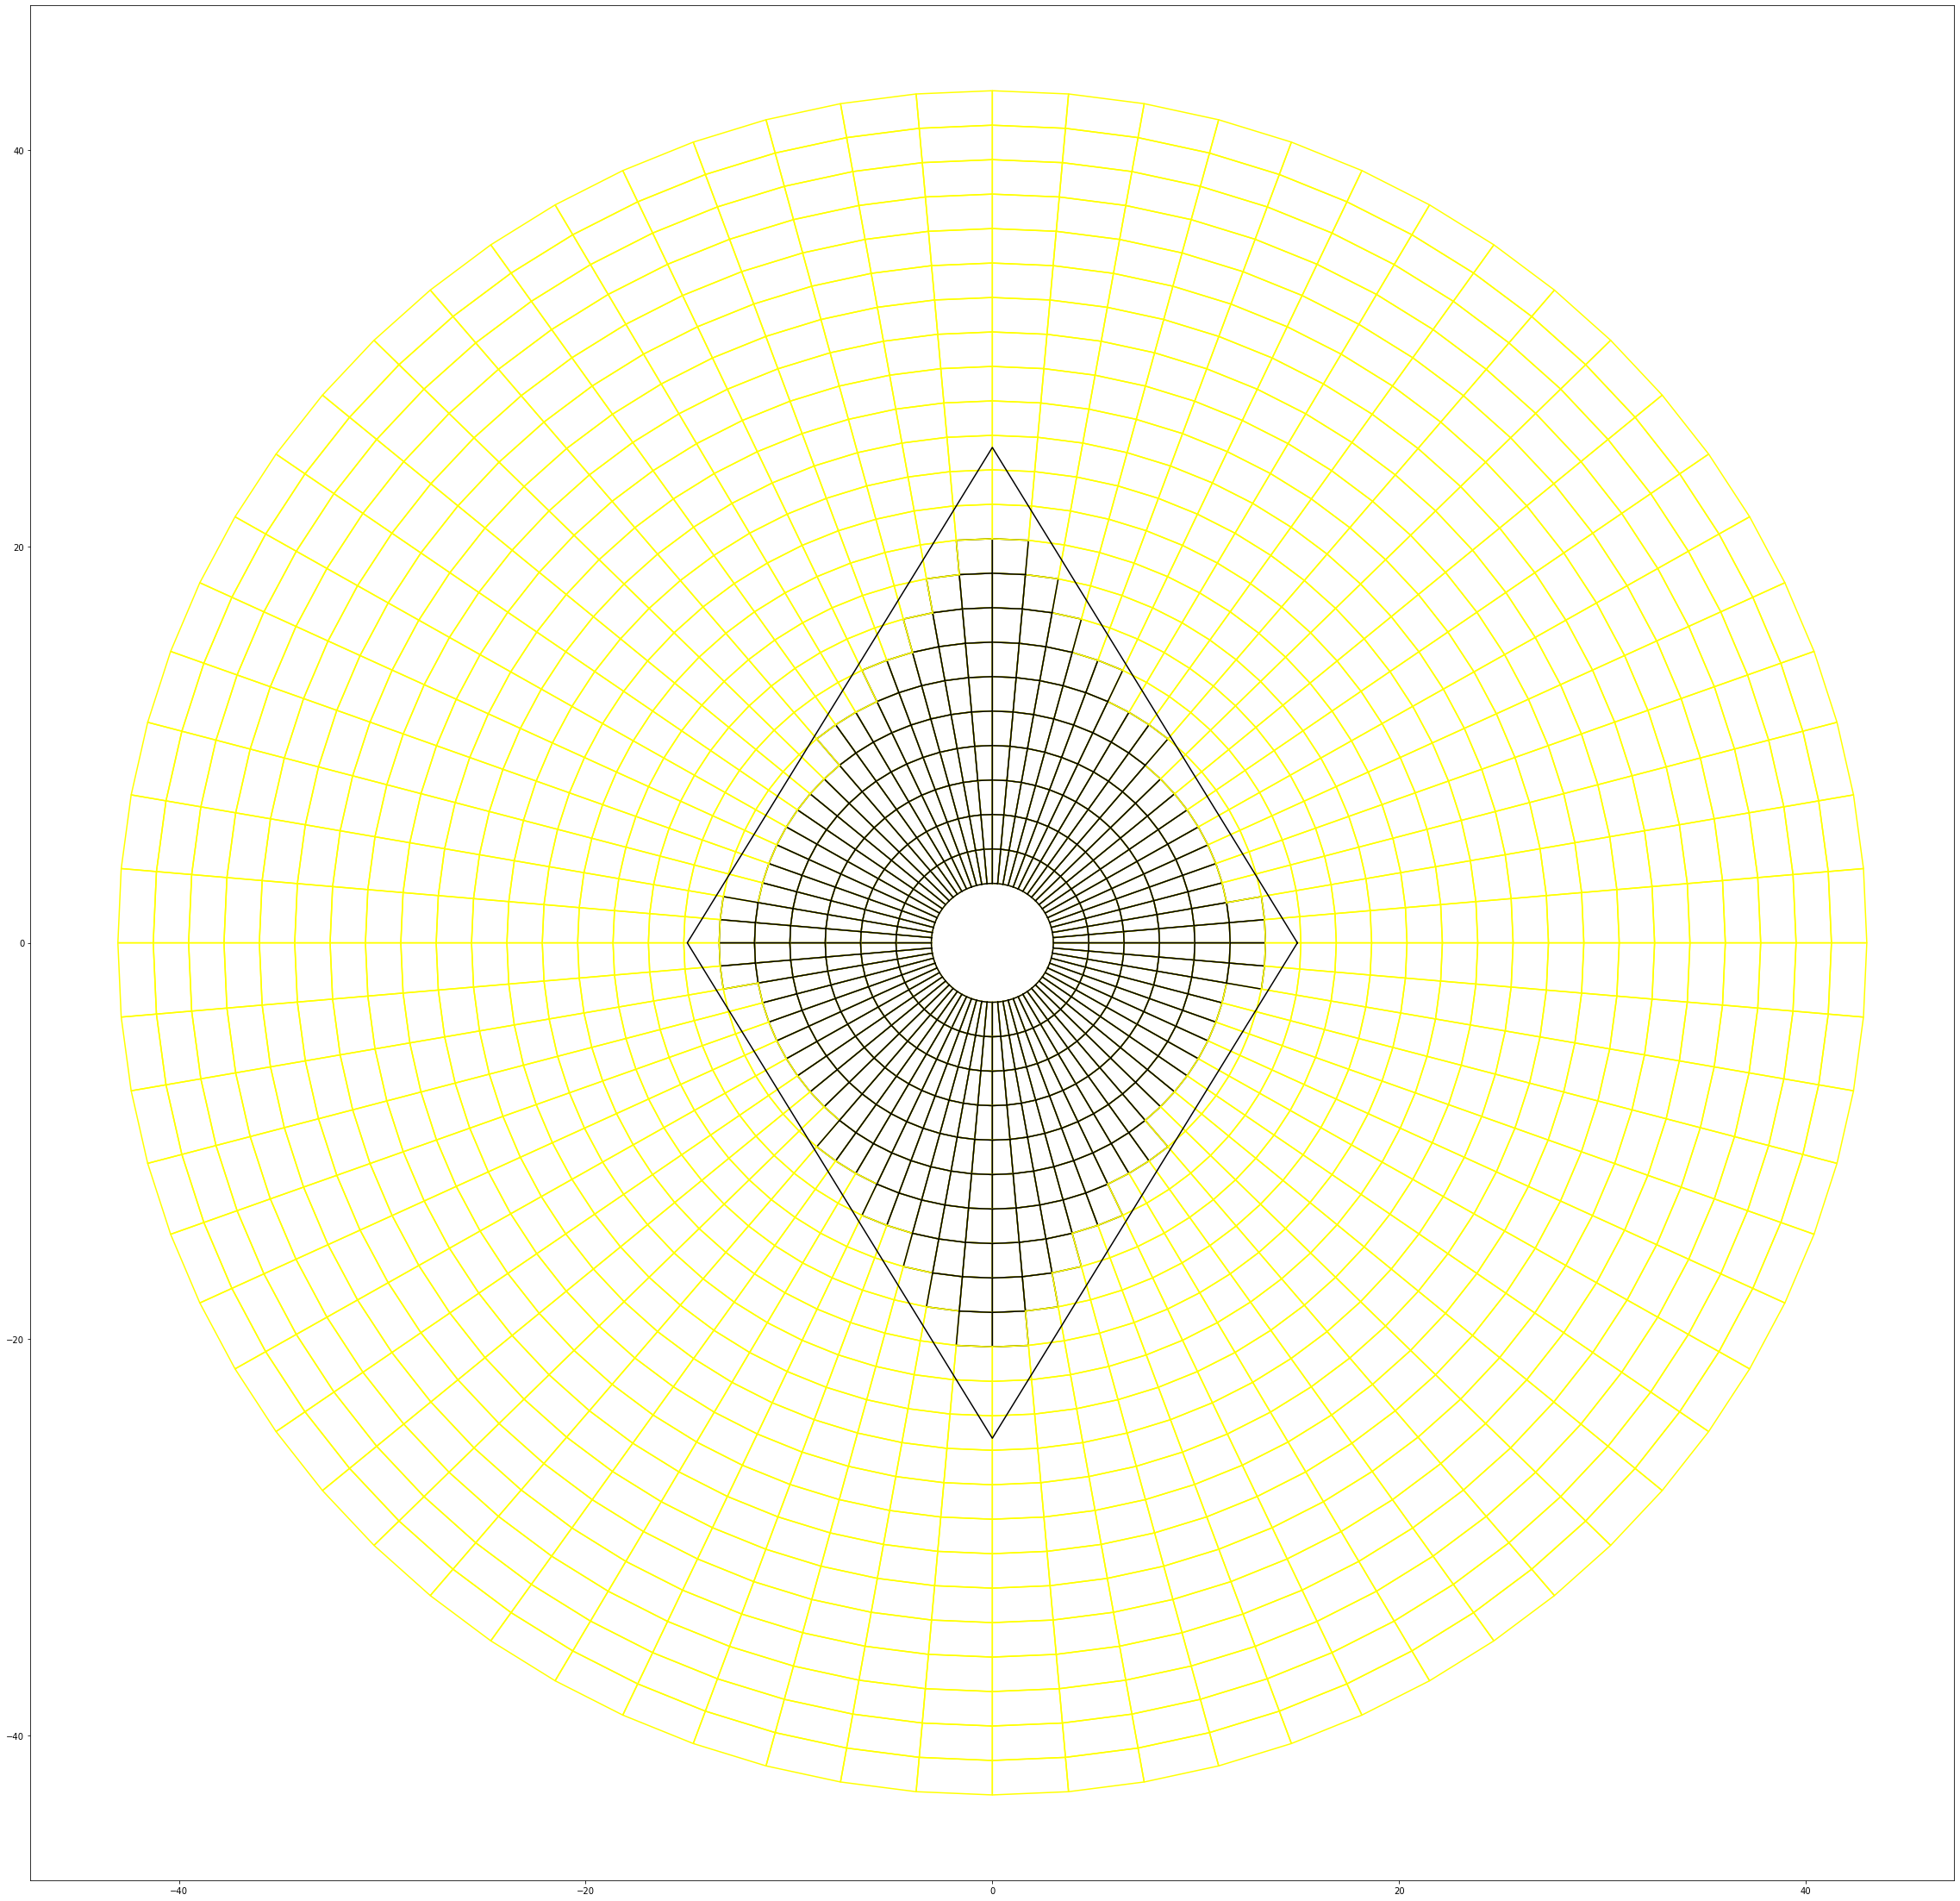

In [5]:
#Diamond 



Lx=2*IR+25
By=2*IR+25

print((Lx/2, 0), (0,By/2), (-Lx/2,0), (0,-By/2))

metal_polygon=[(Lx/2, 0), (0,By/2), (-Lx/2,0), (0,-By/2)]

metal_polygon.append(metal_polygon[0])

polygon1 = Polygon(metal_polygon)

for i in range(len(ele)):
    counter=0
    #if(ele[i][j][0]>0 and ele[i][j][1]>0):
    xs,ys=zip(*ele[i])
    plt.plot(xs,ys,color='yellow')

    #if(i not in metal):
    for j in range(4):
        if(polygon1.contains(Point(ele[i][j][0], ele[i][j][1]))):  #  ele[i][j][0]>=0 and ele[i][j][1]>=0):
            counter=counter+1
            if(counter==4):
                xs,ys=zip(*ele[i])
                plt.plot(xs,ys,color='black')
                metal.append(i)


plt.plot([x[0] for x in metal_polygon],[x[1] for x in metal_polygon],color='black')

    
plt.show()

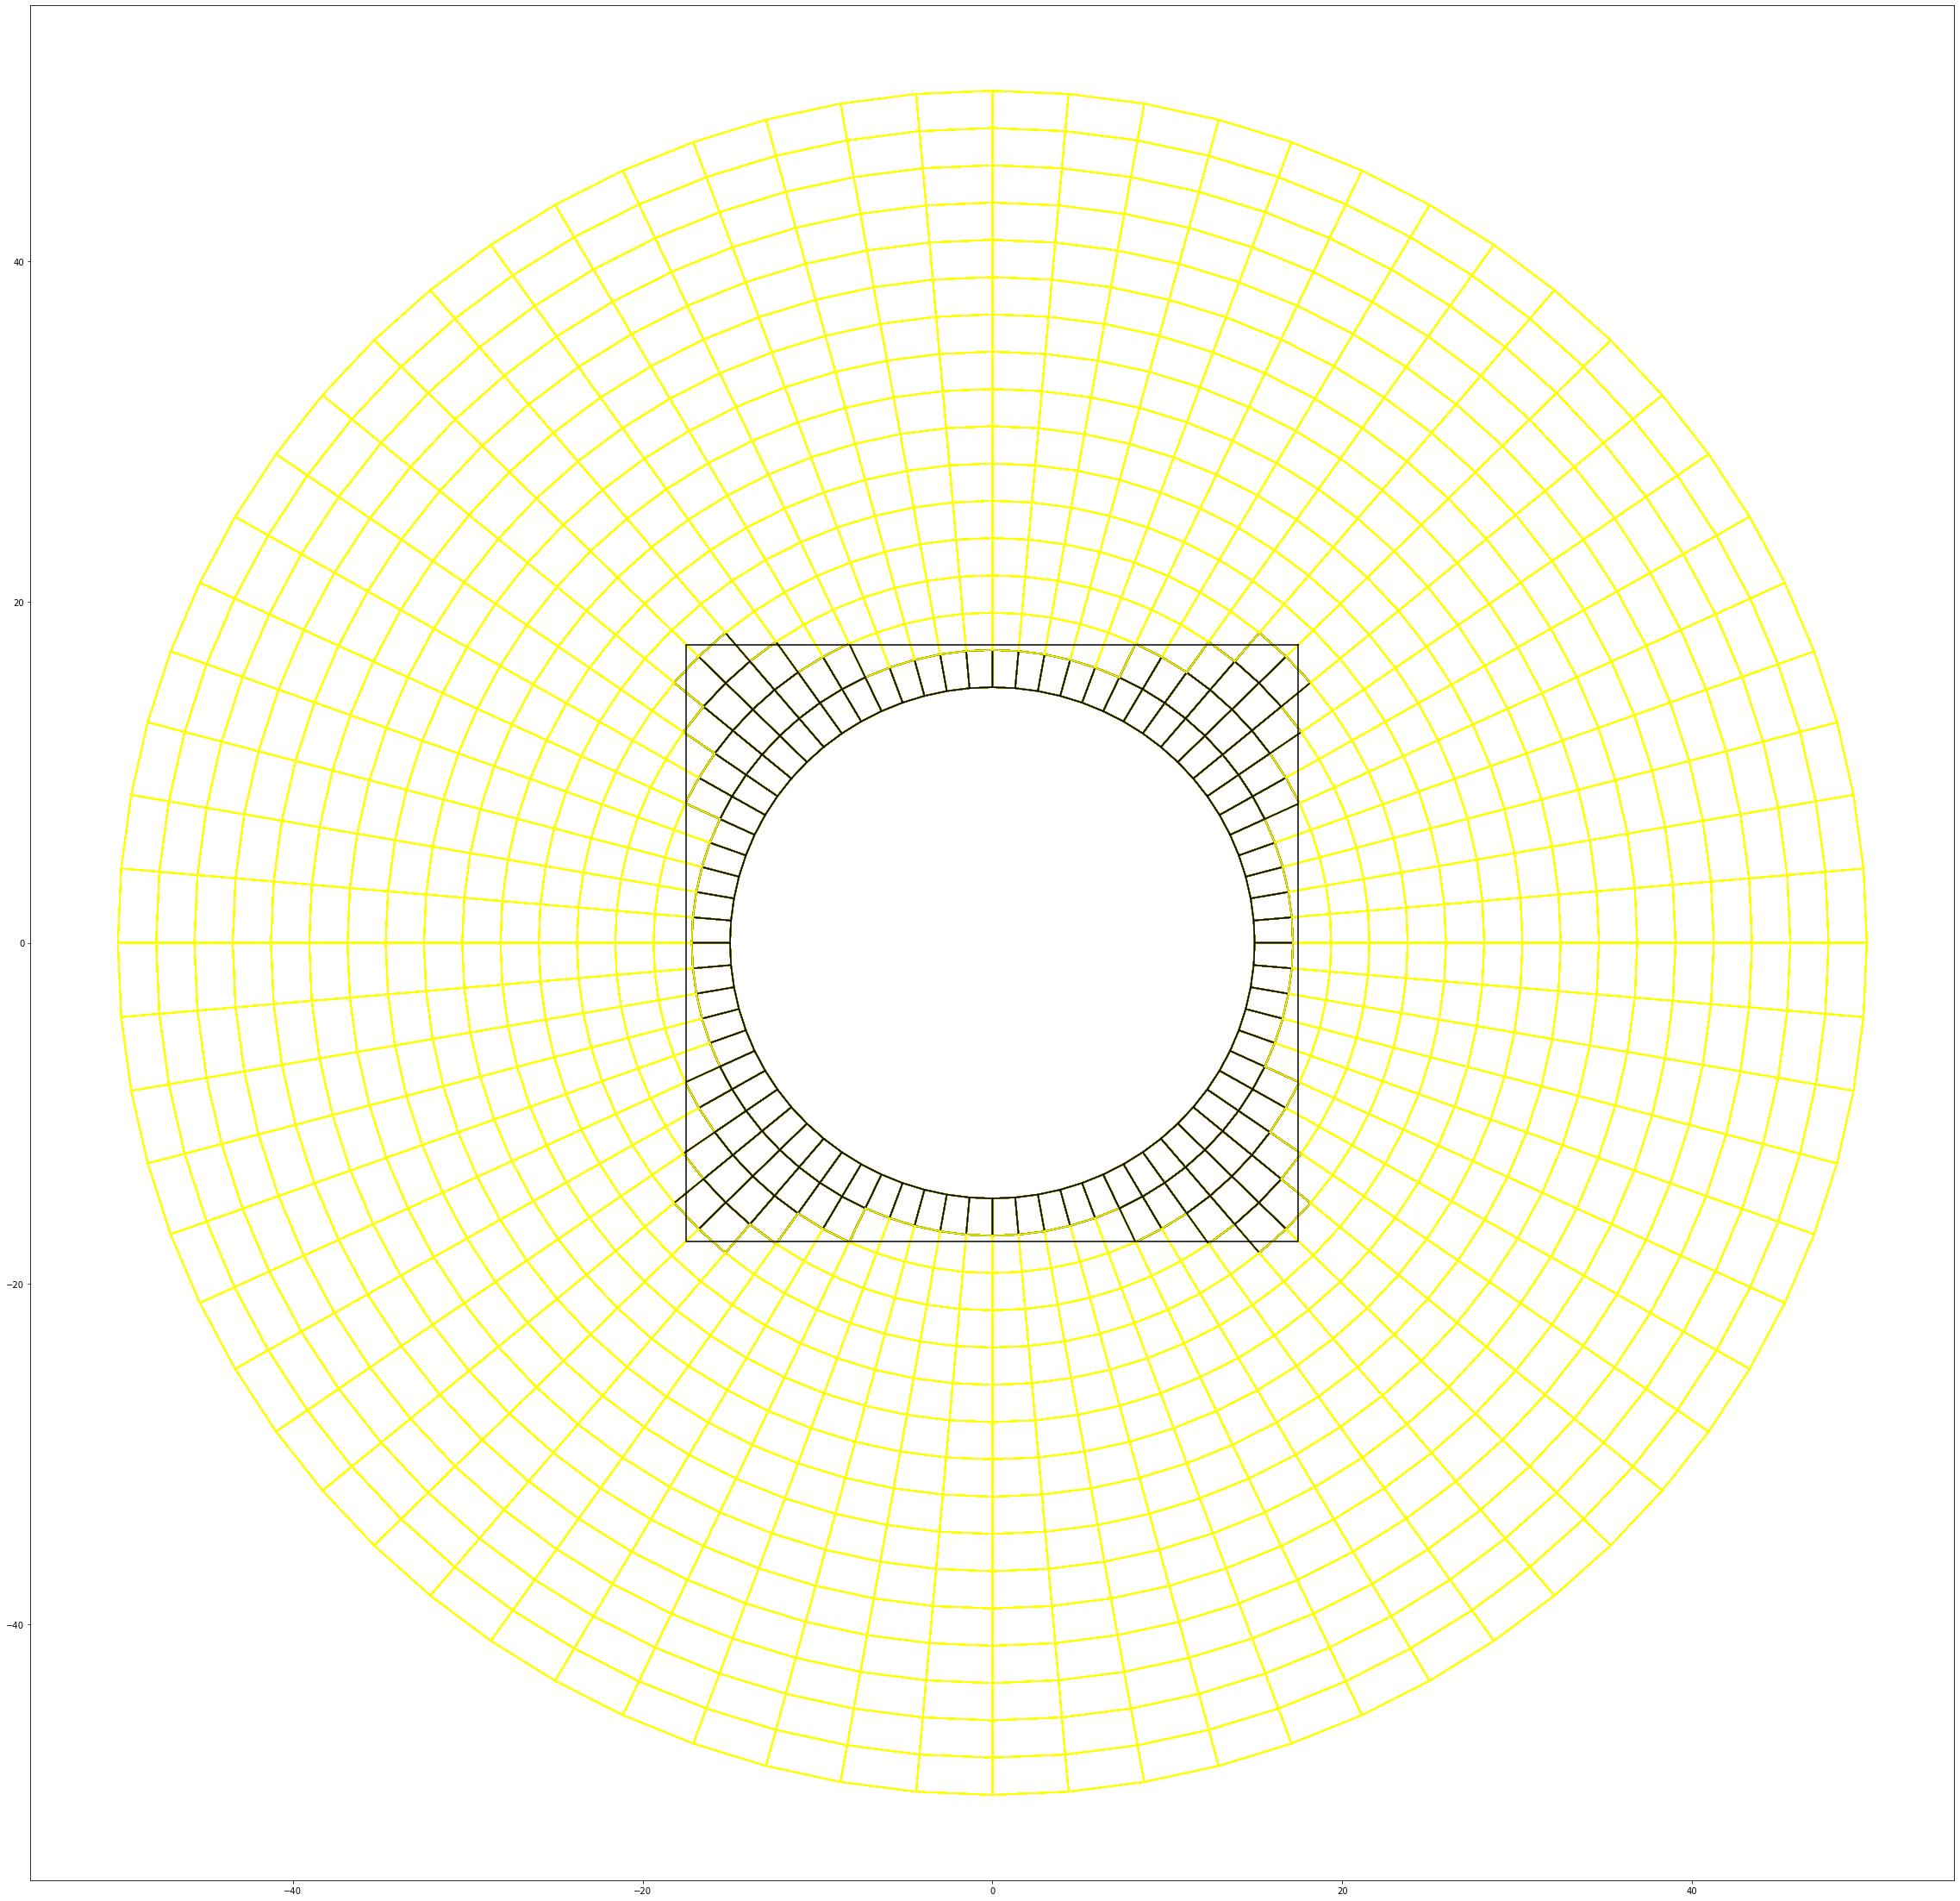

In [5]:
#Square/rectangle 

Lx=2*IR+5
By=2*IR+5


metal_polygon=[(Lx/2, By/2), (-Lx/2,By/2), (-Lx/2,-By/2), (Lx/2,-By/2)]

metal_polygon.append(metal_polygon[0])

polygon1 = Polygon(metal_polygon)

for i in range(len(ele)):
    counter=0
    #if(ele[i][j][0]>0 and ele[i][j][1]>0):
    xs,ys=zip(*ele[i])
    plt.plot(xs,ys,color='yellow')

    #if(i not in metal):
    for j in range(4):
        if(polygon1.contains(Point(ele[i][j][0], ele[i][j][1]))):  #  ele[i][j][0]>=0 and ele[i][j][1]>=0):
            counter=counter+1
            if(counter==3):
                xs,ys=zip(*ele[i])
                plt.plot(xs,ys,color='black')
                metal.append(i)


plt.plot([x[0] for x in metal_polygon],[x[1] for x in metal_polygon],color='black')

    
plt.show()

11.695652173913043


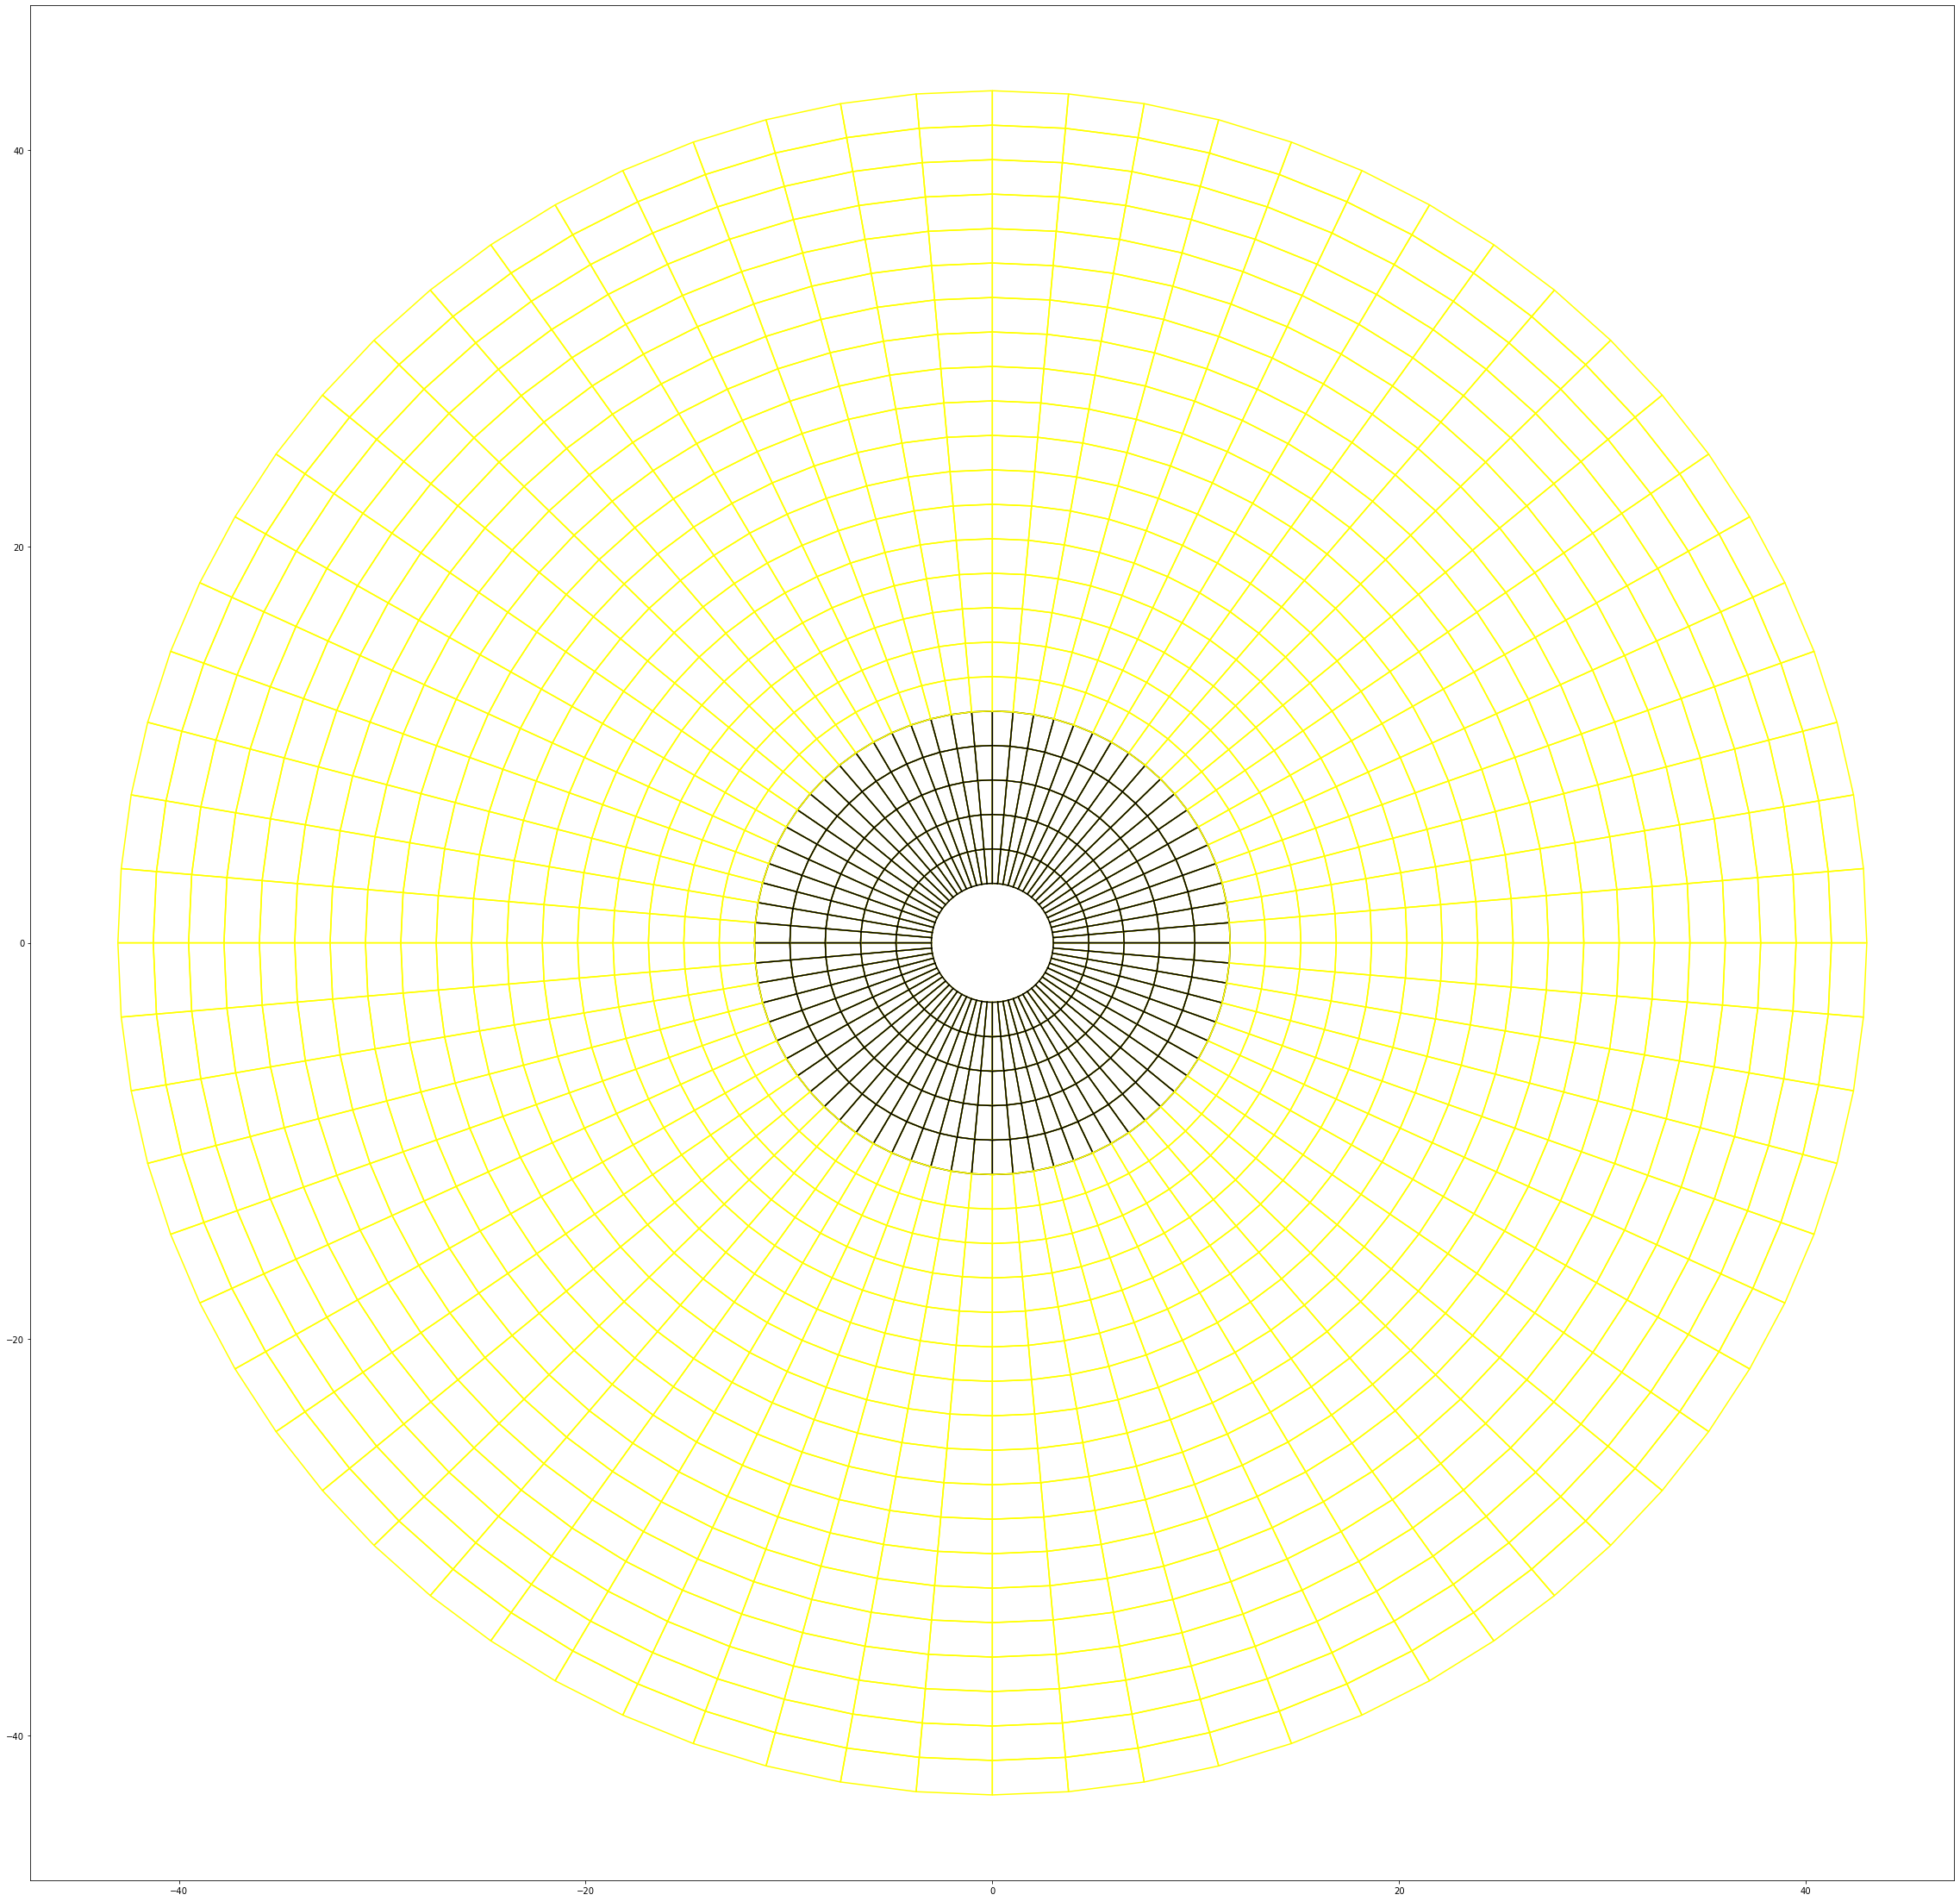

In [5]:
#Ring parameter  
# rad+val range= IR - OR-IR


rad_val = 5

print(r[rad_val])

#polygon1 = Polygon(metal_polygon)

for i in range(len(ele)):
    counter=0
    #if(ele[i][j][0]>0 and ele[i][j][1]>0):
    xs,ys=zip(*ele[i])
    plt.plot(xs,ys,color='yellow')

    #if(i not in metal):
    for j in range(4):
        #if(polygon1.contains(Point(ele[i][j][0], ele[i][j][1]))):  #  ele[i][j][0]>=0 and ele[i][j][1]>=0):
        radius,angle=(polar1(ele[i][j][0],ele[i][j][1]))
   
        if(round(radius,1)>=round(r[0],1) and 
           round(radius,1) <= round(r[rad_val],1) and 
           round((angle),1) >= round(math.degrees(theta[0]),1) and
           round((angle),1) <= round(math.degrees(theta[-1]),1)):
            counter=counter+1
        if(counter==4):            
            ax,ay=zip(*ele[i])
            metal.append(i)
            plt.plot(ax,ay,color='black')


#plt.plot([x[0] for x in metal_polygon],[x[1] for x in metal_polygon],color='black')

    
plt.show()

In [10]:
# Bezier Diamond  
# rad+val range= IR - OR-IR


# lx,by,r,theta (x,y) (points- (points- (lx/2,0),(x,y),(0,by/2),(-x,y),(-l/2,0),(-x,-y),(0,-b/2),(x,-y)))

def pol2cart(rho, phi):
    x = rho * np.cos(math.radians(phi))
    y = rho * np.sin(math.radians(phi))
    return(x, y)





Lx=50
By=50
rad_val=15
theta_val=30
x_val,y_val=pol2cart(rad_val,theta_val)



print(x_val,y_val)


metal_polygon=[(Lx/2, 0),(x_val,y_val),(0,By/2),(-x_val,y_val),(-Lx/2,0),(-x_val,-y_val),(0,-By/2),(x_val,-y_val)]

metal_polygon.append(metal_polygon[0])

polygon1 = Polygon(metal_polygon)

for i in range(len(ele)):
    counter=0
    #if(ele[i][j][0]>0 and ele[i][j][1]>0):
    xs,ys=zip(*ele[i])
    plt.plot(xs,ys,color='yellow')

    #if(i not in metal):
    for j in range(4):
        if(polygon1.contains(Point(ele[i][j][0], ele[i][j][1]))):  #  ele[i][j][0]>=0 and ele[i][j][1]>=0):
            counter=counter+1
            if(counter==4):
                xs,ys=zip(*ele[i])
                plt.plot(xs,ys,color='black')
                metal.append(i)


plt.plot([x[0] for x in metal_polygon],[x[1] for x in metal_polygon],color='black')

    
plt.show()

12.99038105676658 7.499999999999999


**Parameter defenitions**  8 parameters [IRp1,r1,θ1,ORp1,IRp2,r2,θ2,ORp2] 


- IRp1 = [0-16]
-IRp2 = [0-16]
-r1 =  [0-16]
-θ1 = [0-90]
-ORp1 = [0-16]
-ORp2 = [0-16]
-r2 =  [0-16]
-θ2 = [0-90]


[(15.2, 2.98), (46.1, 14.19), (25.75, 40.71), (8.14, 13.06), (15.2, 2.98)]


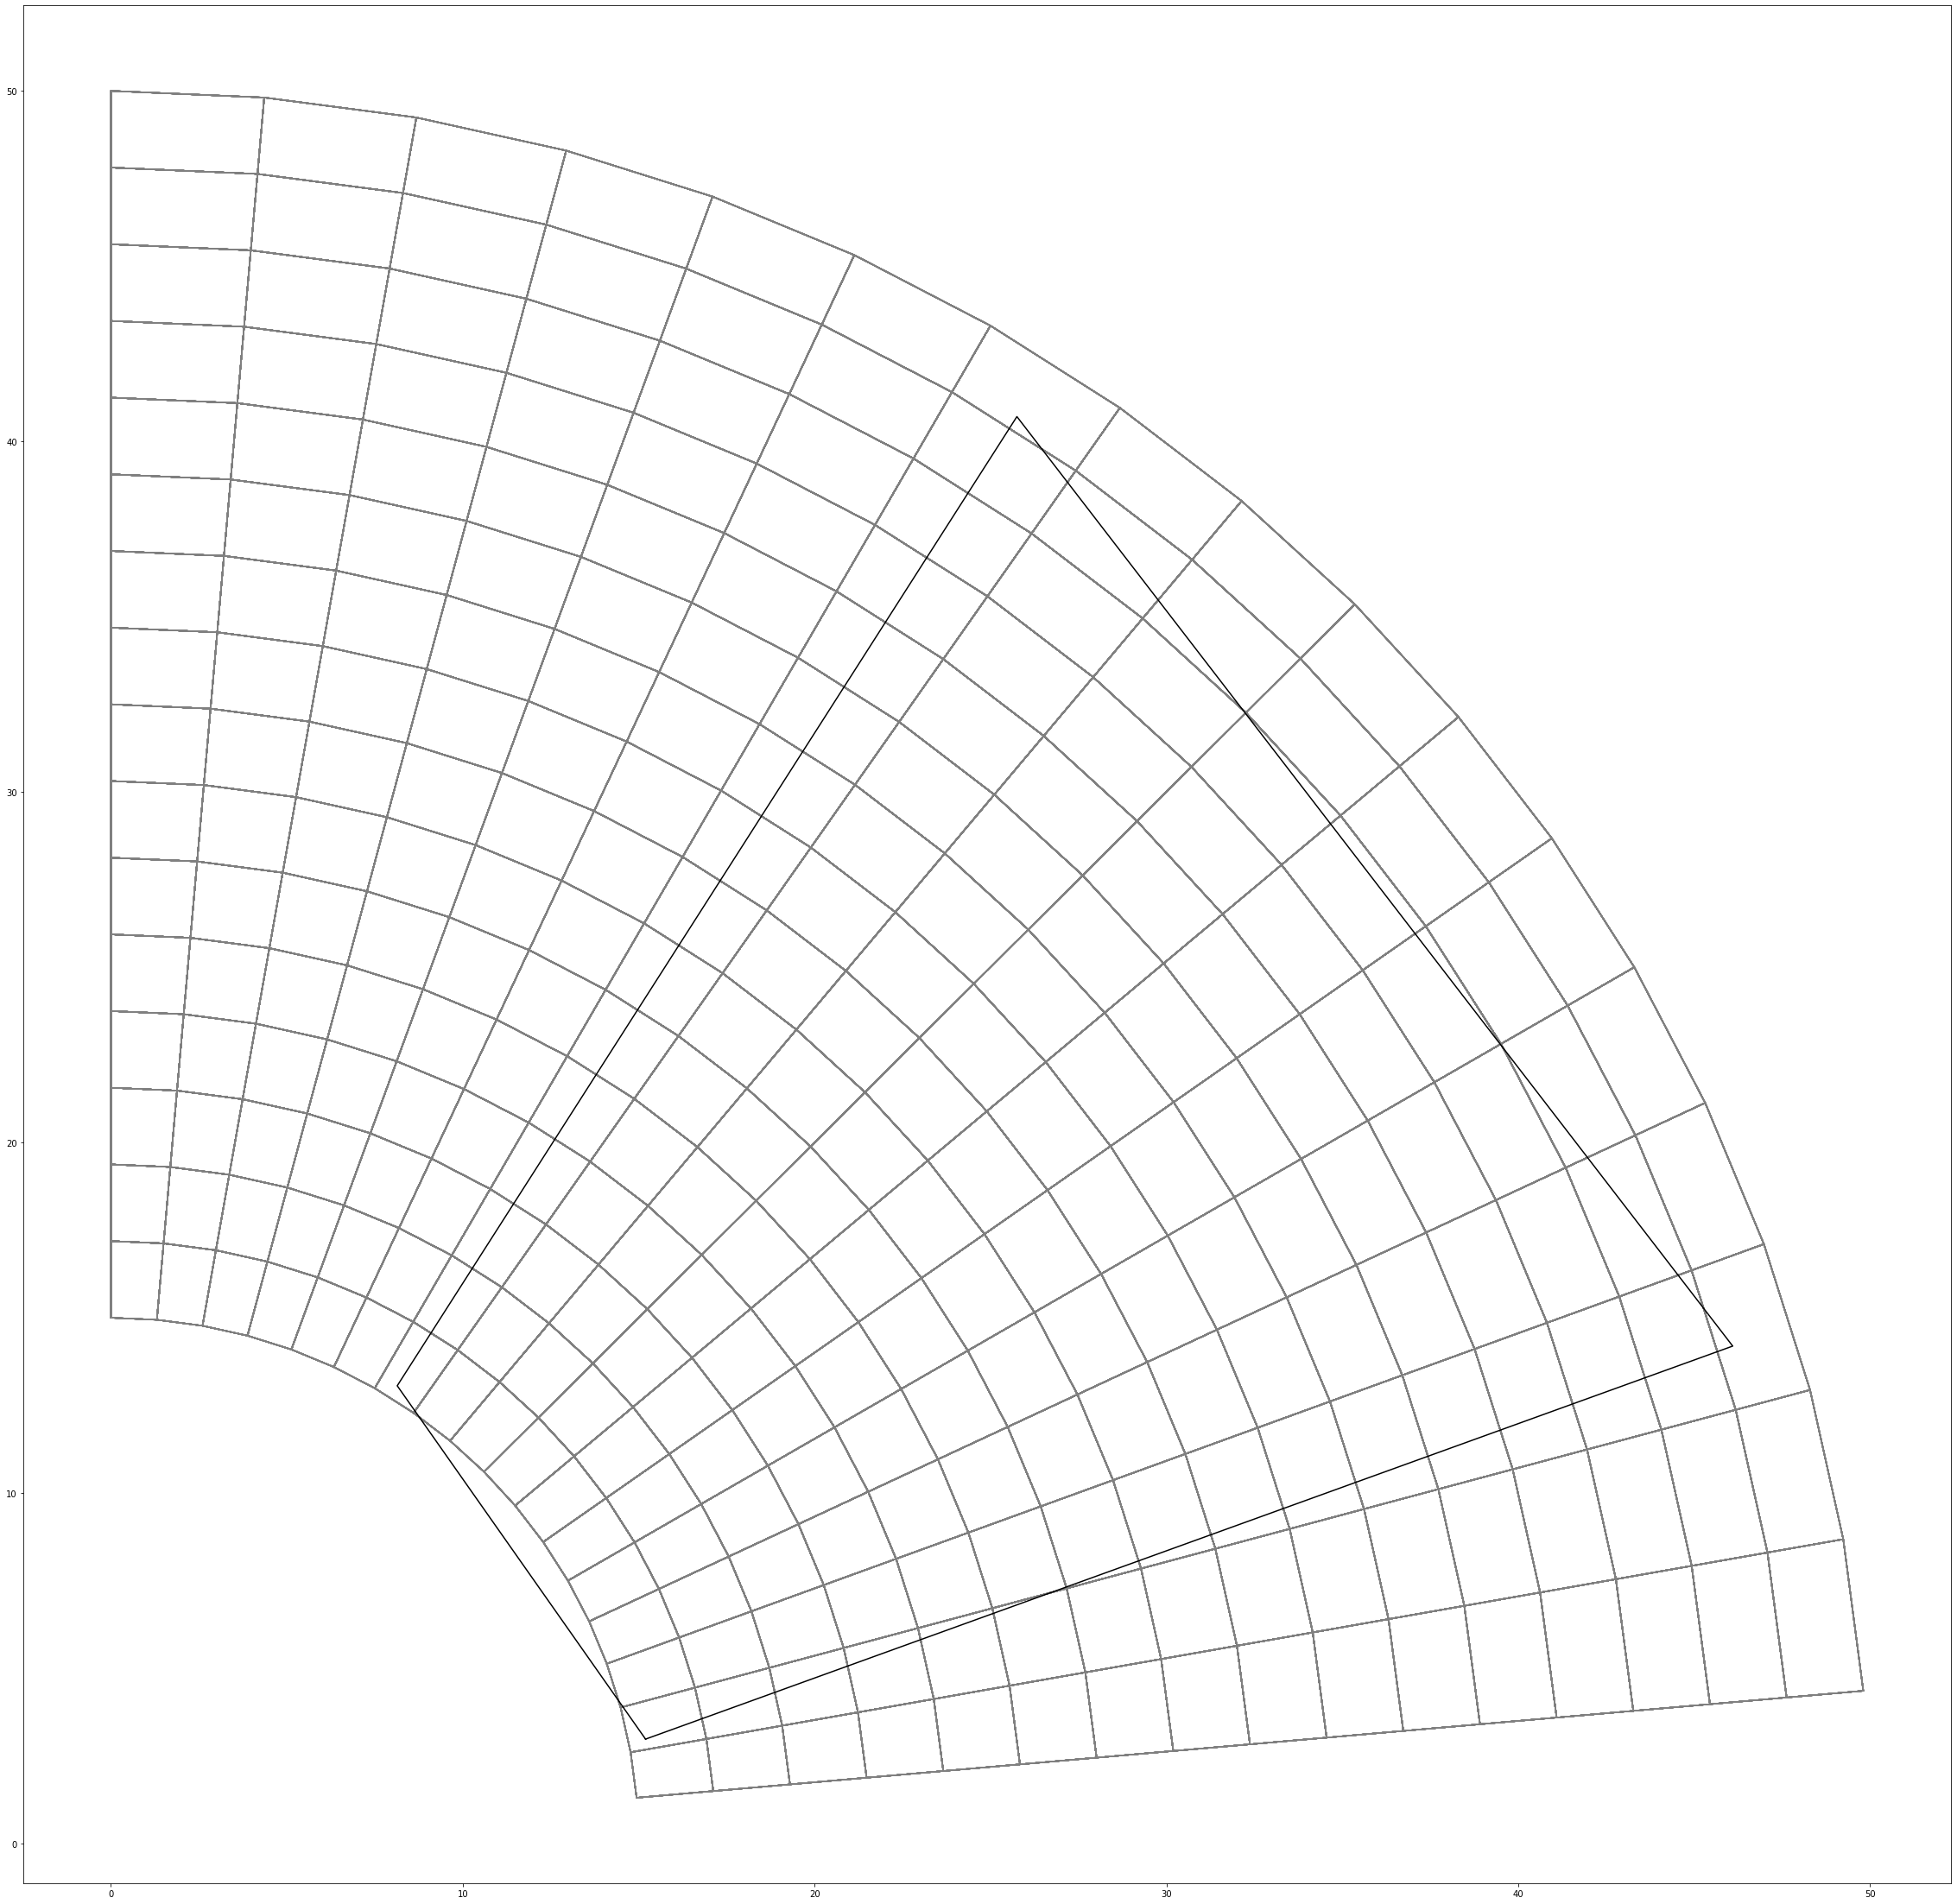

In [6]:
#%matplotlib

def pol2cart(rho, phi):
    x = rho * np.cos(math.radians(phi))
    y = rho * np.sin(math.radians(phi))
    return([x, y])



def polar(x, y):
    """returns r, theta(degrees)
    """
    rads = (x ** 2 + y ** 2) ** .5
    theta_1 = math.degrees(math.atan2(y,x))
    return rads, theta_1


r1=r[2]
r2=r[14]
theta1=math.degrees(theta[0])
theta2=math.degrees(theta[10])


cordinate_list=[]

xs=[]
ys=[]
count=0

#visualizing just the first quadrant elements 
for i in range(len(ele)):
    counter=0
    for j in range(4):
        if(ele[i][j][0]>0 and ele[i][j][1]>0):
            #a.append(ele[i][j][0])
            #b.append(ele[i][j][1])
            counter=counter+1
            if(counter==4):
                xs,ys=zip(*ele[i])
                plt.plot(xs,ys,color='gray')
                x_avg=xs[0]+xs[1]+xs[2]+xs[3]
                y_avg=ys[0]+ys[1]+ys[2]+ys[3]
                if(count<(17*16)):
                    #plt.text((x_avg/4)-0.5,(y_avg/4)-0.5,str(count),fontsize=35)
                    cordinate_list.append(([(x_avg/4)-0.5,(y_avg/4)-0.5]))
                count=count+1


parameter=[1,0,0,2,10,0,0,10]

# for 1st being line 
polygon_list=[]
if(parameter[1]==0 and parameter[2]==0):
    polygon_list.append([cordinate_list[parameter[0]]])
    polygon_list.append([cordinate_list[parameter[3]+255]])

#for 1st being a curve
if(parameter[1]!=0 and parameter[2]!=0):
    polygon_list.append([cordinate_list[parameter[0]]])
    polygon_list.append([pol2cart(parameter[1],parameter[2])])
    polygon_list.append([cordinate_list[parameter[3]+255]])
    
    
#for 2nd being a line 
if(parameter[5]==0 and parameter[6]==0):
    polygon_list.append([cordinate_list[parameter[7]+255]])
    polygon_list.append([cordinate_list[parameter[4]]])
    

#for 2nd being a curve
if(parameter[5]!=0 and parameter[6]!=0):
    polygon_list.append([cordinate_list[parameter[7]+255]])
    polygon_list.append([pol2cart(parameter[5],parameter[6])])
    polygon_list.append([cordinate_list[parameter[4]]])

polygon_list.append(polygon_list[0])



polygons=[]


for x in polygon_list:
    polygons.append((round(x[0][0],2),round(x[0][1],2)))

#Visualizing the polygon formed 
plt.plot([x[0][0] for x in polygon_list],[x[0][1] for x in polygon_list],color='black')


print(polygons)
    
plt.show()



In [7]:
%matplotlib
rubber=[]


polygon = Polygon(polygons)
print(polygon)

for i in range(len(ele)):
    counter=0
    for j in range(4):
        if(ele[i][j][0]>0 and ele[i][j][1]>0):
            xs,ys=zip(*ele[i])
            plt.plot(xs,ys,color='green')
        if(i not in metal):
            if(polygon.contains(Point(ele[i][j][0], ele[i][j][1]))):  #  ele[i][j][0]>=0 and ele[i][j][1]>=0):
                counter=counter+1
                if(counter==4):
                    xs,ys=zip(*ele[i])
                    plt.plot(xs,ys,color='magenta')
                    rubber.append(i)

plt.plot([x[0][0] for x in polygon_list],[x[0][1] for x in polygon_list],color='black')
#plt.plot([x[0] for x in metal_polygon],[x[1] for x in metal_polygon],color='black')


plt.show()




Using matplotlib backend: Qt5Agg
POLYGON ((15.2 2.98, 46.1 14.19, 25.75 40.71, 8.14 13.06, 15.2 2.98))


In [9]:
#logic for squar, diamond and bezier diamond 
# to check % of overlapped area

spolygon1=sympy.Polygon(*mapping(polygon1)['coordinates'][0])  #metal

spolygon=sympy.Polygon(*mapping(polygon)['coordinates'][0])

#the points on the insert  
print((spolygon1.intersection(spolygon)[0]),(spolygon1.intersection(spolygon)[1]))


plt.scatter(spolygon1.intersection(spolygon)[0][0],(spolygon1.intersection(spolygon)[0][1]))

plt.scatter(spolygon1.intersection(spolygon)[1][0],(spolygon1.intersection(spolygon)[1][1]))


#print(*mapping(polygon)['coordinates'][0])


#poly_mapped = mapping(intersec_points)

#poly_coordinates = poly_mapped['coordinates']

#print(list(poly_coordinates))


#print([round(x[0],2) for x in poly_coordinates[0]])



#plt.scatter([round(x[0],2) for x in poly_coordinates[0]],[round(x[1],2) for x in poly_coordinates[0]])

plt.plot([x[0][0] for x in polygon_list],[x[0][1] for x in polygon_list],color='black')
#plt.plot([x[0][0] for x in polygon_list],[x[0][1] for x in polygon_list],color='black')
plt.plot([x[0] for x in metal_polygon],[x[1] for x in metal_polygon],color='black')

#print(spolygon1.intersection(Line(Point(0, 0), Point(0, 50))))

plt.show()

#print([x[0]  for x in metal_polygon if x[0]>0])






Point2D(136621/38470, 25) Point2D(15, 377536/90925)


NameError: name 'Line' is not defined

In [23]:
c1 = sympy.Circle(sympy.Point(0, 0), r[rad_val])
spolygon=sympy.Polygon(*mapping(polygon)['coordinates'][0])
print((c1.intersection(spolygon)[0]),(c1.intersection(spolygon)[1]))




figure, axes = plt.subplots()
draw_circle = plt.Circle((0, 0), r[rad_val])

axes.set_aspect(1)
axes.add_artist(draw_circle)
plt.title('Circle')

plt.scatter(c1.intersection(spolygon)[0][0],(c1.intersection(spolygon)[0][1]))

plt.scatter(c1.intersection(spolygon)[1][0],(c1.intersection(spolygon)[1][1]))
plt.plot([x[0][0] for x in polygon_list],[x[0][1] for x in polygon_list],color='black')

plt.show()



Point2D(77673948/365622325 + 10911*sqrt(73237281113449)/8409313475, -239001818/365622325 + 3546*sqrt(73237281113449)/8409313475) Point2D(341*sqrt(106535404178911)/3430608700 + 197624237/149156900, -17517511/149156900 + 3847*sqrt(106535404178911)/3430608700)


In [9]:
#plot for all 4 quadrants rubber and metal pattern 

rubber_lis=[]

#for i in range(len(rubber)):
#    for j in range(4):
#        rub_r,rub_th=polar1(nodes[e_list[rubber[i]][j+1]][1],nodes[e_list[rubber[i]][j+1]][2])
#        print(rub_r,rub_th)


'''
for i in range(len(e_list)):
    if i in metal:
        continue
    for j in range(len(rubber)):
        for k in range(4):
            ra,th=polar1(nodes[e_list[i][k+1]][1],nodes[e_list[i][k+1]][2])
            rub_r,rub_th=polar1(nodes[e_list[rubber[j]][k+1]][1],
                                nodes[e_list[rubber[j]][k+1]][2])
            #print("rubber r and theta ="+str(rub_r)+","+str(rub_th)+" e_lis ele="+str(ra)+","+str(th))
            #if(ra==rub_r and (180-rub_th==th or (rub_th)==th or rub_th+180==th or 360-(rub_th)==th)):
            if(ra==rub_r and 180-rub_th==th):
                #print(i,k,rub_th,th)
                rubber_lis.append(i+1)
'''
                
                
for i in range(len(e_list)):
    if i in metal:
        continue
    for j in range(len(rubber)):
        
        ra,th=polar1(nodes[e_list[i][1]-1][1],nodes[e_list[i][1]-1][2])
        rub_r,rub_th=polar1(nodes[e_list[rubber[j]][1]-1][1],nodes[e_list[rubber[j]][1]-1][2])
        if((ra==rub_r) and (th== rub_th or th==180-(rub_th+360/thetasteps) or th==180+rub_th or th==360-(rub_th+360/thetasteps))):
       
            rubber_lis.append(i)
            
#print(rubber_lis,len(rubber_lis))






In [ ]:
'''
for k in range(len(e_list)):
    for i in range(len(rubber)):
        counter=0
        for j in range(4):
            #if(np.abs((round(nodes[e_list[k][j+1]][1]),1)).any() == round(nodes[e_list[rubber[i]][j+1]][1],1) and 
            #   np.abs((round(nodes[e_list[k][j+1]][2]),1)).any() == round(nodes[e_list[rubber[i]][j+1]][2],1)):
            #if(abs(round(nodes[e_list[k][j+1]][1],2)))
            if ( abs(round(nodes[e_list[k][j+1]][1],2)) ==  round(nodes[e_list[rubber[i]][j+1]][1],2) and
                 abs(round(nodes[e_list[k][j+1]][2],2)) ==  round(nodes[e_list[rubber[i]][j+1]][2],2) ):
                counter=counter+1
        if(counter==4):
            rubber_lis.append(k)
        

#print(k)
'''

In [10]:
#print(len(rubber_lis),len(e_list))

lis=(np.unique(np.array(rubber_lis)))

print(len(lis),len(rubber_lis))


#for i in range(len(metal)):
#    for j in range(4):
#        plt.scatter(nodes[e_list[metal[i]][j+1]][1],nodes[e_list[metal[i]][j+1]][2],color='magenta')

#plt.show()


6120 122400


In [15]:

#for i in range(len(rubber)):
#    print(e_list[rubber[i]])

#hide=[]

#for i in range(len(e_list)):
#    if(i not in lis and i not in metal):
#        hide.append(i)

#print(len(hide)+len(lis)+len(metal),len(e_list))

#print(len(hide),len(lis),len(metal))
        

3312 3312


In [ ]:
for i in range(len(ele)):
    xs,ys=zip(*ele[i])
    plt.plot(xs,ys,color='blue')
    if(i in lis):
        xs,ys=zip(*ele[i])
        plt.plot(xs,ys,color='yellow')
    if(i in metal):
        xs,ys=zip(*ele[i])
        plt.plot(xs,ys,color='magenta')
    
        
plt.plot([-40,40],[0,0],color='black')

plt.plot([0,0],[-40,40],color='black')
        
        
plt.show()

In [11]:

f = open("Test_insert.inp", "w")
f.write("**\n*HEADING\n**\n**\n**\n**\n*NODE\n")
for i in range(len(nodes)):
    f.write(str(nodes[i][0])+",\t"+str(nodes[i][1])+",\t"+str(nodes[i][2])+",\t"+str(nodes[i][3])+"\n")
    
    
f.write("**\n** SOLID ELEMENTS\n**\n")
    
    
f.write("*ELEMENT, TYPE=C3D8H, ELSET=SOLID_RUBBER\n")
for i in range(len(lis)):
    f.write(str(e_list[lis[i]][0])+",\t"+
            str(e_list[lis[i]][1])+",\t"+
            str(e_list[lis[i]][2])+",\t"+
            str(e_list[lis[i]][3])+",\t"+
            str(e_list[lis[i]][4])+",\t"+
            str(e_list[lis[i]][5])+",\t"+
            str(e_list[lis[i]][6])+",\t"+
            str(e_list[lis[i]][7])+",\t"+
            str(e_list[lis[i]][8])+"\n")


f.write("*ELEMENT, TYPE=C3D8, ELSET=SOLID_METAL\n")
for i in range(len(metal)):
    f.write(str(e_list[metal[i]][0])+",\t"+
            str(e_list[metal[i]][1])+",\t"+
            str(e_list[metal[i]][2])+",\t"+
            str(e_list[metal[i]][3])+",\t"+
            str(e_list[metal[i]][4])+",\t"+
            str(e_list[metal[i]][5])+",\t"+
            str(e_list[metal[i]][6])+",\t"+
            str(e_list[metal[i]][7])+",\t"+
            str(e_list[metal[i]][8])+"\n")


'''f.write("*ELEMENT, TYPE=C3D8, ELSET=SOLID_HIDE \n")
for i in range(len(hide)):
    f.write(str(e_list[hide[i]][0])+",\t"+
            str(e_list[hide[i]][1])+",\t"+
            str(e_list[hide[i]][2])+",\t"+
            str(e_list[hide[i]][3])+",\t"+
            str(e_list[hide[i]][4])+",\t"+
            str(e_list[hide[i]][5])+",\t"+
            str(e_list[hide[i]][6])+",\t"+
            str(e_list[hide[i]][7])+",\t"+
            str(e_list[hide[i]][8])+"\n")
'''



'f.write("*ELEMENT, TYPE=C3D8, ELSET=SOLID_HIDE \n")\nfor i in range(len(hide)):\n    f.write(str(e_list[hide[i]][0])+",\t"+\n            str(e_list[hide[i]][1])+",\t"+\n            str(e_list[hide[i]][2])+",\t"+\n            str(e_list[hide[i]][3])+",\t"+\n            str(e_list[hide[i]][4])+",\t"+\n            str(e_list[hide[i]][5])+",\t"+\n            str(e_list[hide[i]][6])+",\t"+\n            str(e_list[hide[i]][7])+",\t"+\n            str(e_list[hide[i]][8])+"\n")\n'

In [12]:
f_1 = open("material_text.txt", "r")
f.write(f_1.read())
f.close()
